##**Ejemplo de desarrollo análisis en DM basado en alquileres de piso**

🔍 **Objetivo del Proyecto:**  
Desarrollar la fase de entendimiento y preparación de los datos según la metodología CRISP-DM, aplicando las herramientas Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn y TensorFlow a la información proporcionada por el conjunto de datos “Madrid Province Rent Data”. El objetivo consiste en realizar un estudio pormenorizado de las variables disponibles, detectar posibles inconsistencias y preparar la información para su modelado posterior.

In [ ]:
# 1. Librearías de manipulación de Datos
import numpy as np
import pandas as pd

# 2. Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Preprocesamiento y Transformaciones
from sklearn.preprocessing import (
    PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# 4. Selección de Características y Reducción de Dimensionalidad
from sklearn.feature_selection import (
    SelectKBest, f_regression, chi2, mutual_info_classif, f_classif
)
from sklearn.decomposition import PCA

# 5. Modelado y Algoritmos
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    GradientBoostingRegressor, IsolationForest, RandomForestRegressor, RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC

# Separar variables predictoras y objetivo
from sklearn.calibration import label_binarize

# 6. Evaluación y Métricas
from sklearn.metrics import (
    mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error,
    classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# 7. Optimización y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV,
    cross_val_predict, StratifiedKFold
)

# 8. Manejo de Desequilibrio en Datos
from imblearn.over_sampling import SMOTE

# 9. Otras Utilidades
from scipy.stats import randint, uniform
import time
import joblib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Carga inicial del Dataset

En esta sección, se carga el dataset 'idealista.csv' y se realiza una limpieza inicial eliminando columnas irrelevantes.
* web_id: idealista id
* url: idealista link
* title: english title
* type: property type
* price: price to rent the property
* deposit: deposit needed to rent
* private_owner: if the property owner is private or not
* professional_name: agency name, null => private owner
* floor_built: built area in square meters. Superficie total
* floor_area: living area in square meters. Superficie util
* floor: floor number
* year_built: year of the building
* orientation: orientation of the property
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms
* second_hand: if the property is not new or not
* lift: if the property has lift or not
* garage_included: if the property has garage or not
* furnished: if the property is furnished or not
* equipped_kitchen: if the property has equipped kitchen or not
* fitted_wardrobes: if the property has fitted wardrobes or not
* air_conditioning: if the property has air conditioning or not
* terrace: if the property has terrace or not
* balcony: if the property has balcony or not
* storeroom: if the property has storeroom or not
* swimming_pool: if the property has swimming pool or not
* garden_area: if the property has a garden area or not
* location: property address
* district: property district from idealista
* subdistrict: property subdistrict from idealista
* postalcode: property postal code
* last update: last update date from idealista

In [ ]:
#carga de datos de "Madrid Province Rent Data" en un dataframe df
df=pd.read_csv("idealista.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   web_id             9229 non-null   int64  
 1   url                9229 non-null   object 
 2   title              9229 non-null   object 
 3   type               9229 non-null   object 
 4   price              9229 non-null   int64  
 5   deposit            5407 non-null   float64
 6   private_owner      9229 non-null   bool   
 7   professional_name  7622 non-null   object 
 8   floor_built        9229 non-null   int64  
 9   floor_area         3938 non-null   float64
 10  floor              8908 non-null   object 
 11  year_built         2893 non-null   float64
 12  orientation        4411 non-null   object 
 13  bedrooms           9229 non-null   int64  
 14  bathrooms          9229 non-null   int64  
 15  second_hand        9229 non-null   bool   
 16  lift               9229 

In [ ]:
# Eliminar columnas no necesarias
df = df.drop(['web_id', 'url', 'title', 'floor_area'], axis=1)
#df.dropna(subset=['price'])
df.head(2)

,type,price,deposit,private_owner,professional_name,floor_built,floor,year_built,orientation,bedrooms,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
0,Flat,1400,NaN,False,Silcasas Ochocientas,60,3rd,1954.0,NaN,2,...,True,False,False,False,False,"pablo luna, 4, Subdistrict Castilla, District ...",Chamartín,Castilla,28046.0,7 November
1,Penthouse,1300,1.0,False,Cruzity,77,6th,1961.0,NaN,2,...,False,False,False,False,False,"Calle de Bolivia, Subdistrict Bernabéu-Hispano...",Chamartín,Bernabéu-Hispanoamérica,28016.0,7 November


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               9229 non-null   object 
 1   price              9229 non-null   int64  
 2   deposit            5407 non-null   float64
 3   private_owner      9229 non-null   bool   
 4   professional_name  7622 non-null   object 
 5   floor_built        9229 non-null   int64  
 6   floor              8908 non-null   object 
 7   year_built         2893 non-null   float64
 8   orientation        4411 non-null   object 
 9   bedrooms           9229 non-null   int64  
 10  bathrooms          9229 non-null   int64  
 11  second_hand        9229 non-null   bool   
 12  lift               9229 non-null   bool   
 13  garage_included    9229 non-null   bool   
 14  furnished          9229 non-null   bool   
 15  equipped_kitchen   9229 non-null   bool   
 16  fitted_wardrobes   9229 

In [ ]:
#se identifica los valores nulos
df.isna().sum()

,0
type,0
price,0
deposit,3822
private_owner,0
professional_name,1607
floor_built,0
floor,321
year_built,6336
orientation,4818
bedrooms,0


In [ ]:
#Se rellena los valores nulos
#Se considera que si floor es null entonces es porque es una casa o un chalet y no tiene pisos
df['floor'] = df['floor'].fillna(0)
df['deposit'] = df['deposit'].fillna(0)
df['professional_name'] = df['professional_name'].fillna('private owner')

In [ ]:
#valores nulos
df.isna().sum()

,0
type,0
price,0
deposit,0
private_owner,0
professional_name,0
floor_built,0
floor,0
year_built,6336
orientation,4818
bedrooms,0


# Análisis Exploratorio de Datos (EDA)

## Introducción
El **Análisis Exploratorio de Datos (EDA)** es una fase fundamental en la ciencia de datos que permite comprender la distribución de las variables, detectar patrones y posibles problemas en los datos. En esta sección, se realizan visualizaciones univariantes, bivariantes y multivariantes para analizar el dataset de idealista.csv

## Objetivos
* Identificar la distribución de las variables clave.  
* Detectar valores atípicos (**outliers**).  
* Comprender relaciones entre variables para futuras etapas del modelado.  

## Tipos de Análisis Realizados
1. **Análisis Univariante**:  
   - Histogramas para ver la distribución de variables numéricas.  
   - Boxplots para detectar valores atípicos en variables clave como 'price'.  
   - Countplots para visualizar la frecuencia de categorías en variables como `room_type`.  

2. **Análisis Bivariante**:  
   - Scatterplots para analizar la relación entre 'latitude', 'longitude' y 'price'.  
   - Boxplots comparativos para observar la distribución de precios según 'room_type' y 'neighbourhood_group'.  

3. **Análisis Multivariante**:  
   - Matriz de correlaciones (heatmap) para ver relaciones entre variables numéricas.  
   - Pairplots para visualizar interacciones clave entre múltiples variables.  

A continuación, se presentan los gráficos con sus respectivas interpretaciones.


- Análisis de la Distribución de Precios

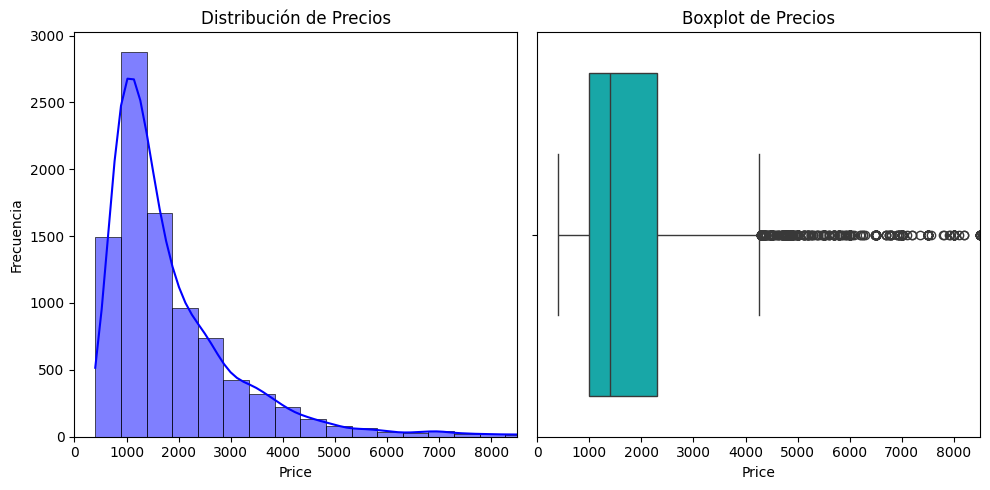

In [ ]:
plt.figure(figsize=(10, 5))

# Histograma de precios con KDE
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=50, kde=True, color='b')
plt.xlim(0, df["price"].quantile(0.99))  # Limitar a percentil 99
plt.title("Distribución de Precios")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

# Boxplot de precios
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], showfliers=True, color='c')
plt.xlim(0, df["price"].quantile(0.99))
plt.title("Boxplot de Precios")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

## Observaciones del gráfico

El gráfico presentado muestra dos visualizaciones clave sobre la variable price:

1. **Histograma con KDE (Izquierda)**  

La mayoría de los precios de los alojamientos están concentrados en valores bajos (entre $1000 y $2000).
La distribución está altamente sesgada a la derecha, con una larga cola de valores altos.
Existen precios extremadamente elevados que afectan la media y generan sesgo en los datos.
2. **Boxplot de price (Derecha)**

Se observa una mediana cercana a los  1000− 1500.
Hay una gran cantidad de valores atípicos (outliers), especialmente a partir de los $4000.
La presencia de estos valores extremos puede distorsionar el análisis y afectar modelos de predicción.

⚠️ Problema Detectado
- **Sesgo en la distribución**: La variable price no sigue una distribución normal, lo que puede afectar modelos que asumen normalidad en los datos.

- **Valores atípicos**: Los outliers pueden impactar negativamente en el desempeño de los modelos de regresión, ya que pueden generar predicciones inestables.

- **Posible solución**: Se recomienda aplicar una transformación logarítmica (log(price)) para reducir la asimetría y mejorar la distribución de los datos.

## Matriz de Correlaciones entre Variables Numéricas

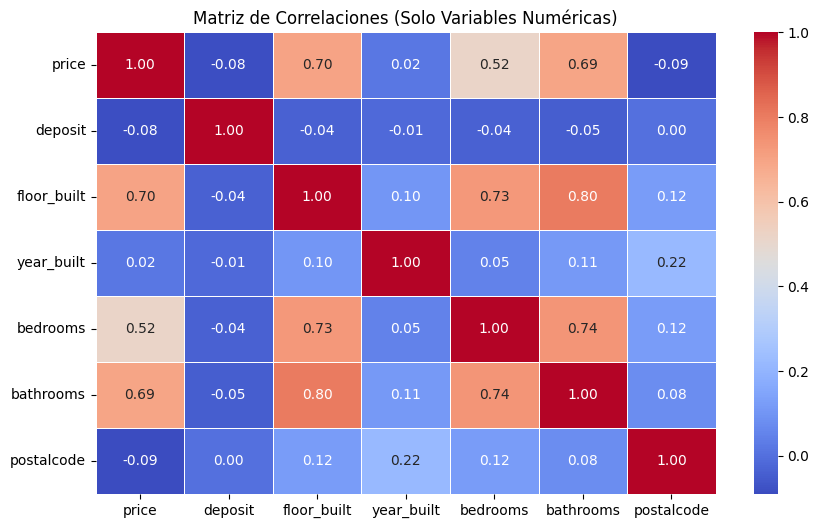

In [ ]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])
# Generar el heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones (Solo Variables Numéricas)")
plt.show()

##Descripción del gráfico
Este heatmap muestra la matriz de correlaciones entre las variables numéricas del dataset de idealista. Cada celda representa el coeficiente de correlación entre dos variables, con un rango de valores entre -1 y 1:

- **Valores cercanos a 1**: Indican una fuerte correlación positiva (cuando una variable aumenta, la otra también).
- **Valores cercanos a -1**: Indican una fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).
- **Valores cercanos a 0**: Indican poca o ninguna relación lineal entre las variables.

In [ ]:
#Presentación de resultados

# 1. Preprocesamiento de Datos Numéricos - REGRESIÓN

## **## - Evaluación Inicial del Modelo: Preprocesamiento de Datos Numéricos**
Pipeline de regresión

In [ ]:
#regresión
df.head(1)

,type,price,deposit,private_owner,professional_name,floor_built,floor,year_built,orientation,bedrooms,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
0,Flat,1400,0.0,False,Silcasas Ochocientas,60,3rd,1954.0,NaN,2,...,True,False,False,False,False,"pablo luna, 4, Subdistrict Castilla, District ...",Chamartín,Castilla,28046.0,7 November


In [ ]:
# Seleccionar columnas relevantes (sin 'price' en X)
X = df[['type', 'deposit', 'floor_built', 'private_owner', 'year_built', 'terrace',	'balcony', 'storeroom', 'swimming_pool', 'garden_area']]
# Se mantiene 'price' solo para 'y'
y = df['price']

In [ ]:
# Filtrar valores extremos en el precio (eliminar outliers del 1% superior)
df = df[df['price'] < df['price'].quantile(0.99)]

In [ ]:
#Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
numerical_columns = X_train.select_dtypes(include=[np.number]).columns # np.number alternativa
print('numerical_columns', numerical_columns)

categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns
print('\ncategorical_columns',categorical_columns)

numerical_columns Index(['deposit', 'floor_built', 'year_built'], dtype='object')

categorical_columns Index(['type', 'private_owner', 'terrace', 'balcony', 'storeroom',
       'swimming_pool', 'garden_area'],
      dtype='object')


In [ ]:
# pipeline numéricas
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
pipeline_numerical = make_pipeline(
    # IterativeImputer(RandomForestRegressor(), random_state=42, initial_strategy='median'),
    SimpleImputer(strategy='median'),
)

# pipeline categóricas
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)

In [ ]:
# unir pipelines con ColumnTransformer unir cols num y cat
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])

# pipeline final con el modelo
pipeline = make_pipeline(
    pipeline_all,
    # PCA(),
    RandomForestRegressor()
)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['deposit', 'floor_built', 'year_built'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['type', 'private_owner', 'terrace', 'balcony', 'storeroom',
       'swimming_pool', 'garden_area'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
#Entrenar el modelo en train
pipeline.fit(X_train, y_train)

# Predicciones en test
y_pred = pipeline.predict(X_test)
print(f": {y_pred}")

: [1940.52222222 4183.23       1150.78333333 ... 5121.25833333 1388.24666667
 1379.25      ]


In [ ]:
#Cálculo de métricas
r2_test = r2_score(y_test, y_pred)

# Mostrar resultados
print(f" R² en Test: {r2_test:.5f}")

 R² en Test: 0.64063


##2. Preprocesamiento de Datos Numéricos - CLASIFICACIÓN
Pipeline de clasificación

In [ ]:
# Seleccionar columnas relevantes
caracteristicas = ["price", "floor_built", "bathrooms", "year_built"]
clases = "district"


In [ ]:
# Eliminar filas con valores nulos en estas columnas
df_clean = df.dropna(subset=caracteristicas + [clases])

In [ ]:
# Identificación de columnas numéricas y categóricas
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Preprocesador para imputación, escalado y codificación
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]), cat_features)
])

# Aplicar preprocesamiento una sola vez y guardar los datos transformados
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Codificar la variable categórica "district" a valores numéricos
#label_encoder = LabelEncoder()
#df_clean[clases] = label_encoder.fit_transform(df_clean[clases])

In [ ]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_clean[caracteristicas]
y = df_clean[clases]

In [ ]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelos a evaluar
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', C=1, gamma='scale', probability=True)
}

In [ ]:
# Evaluación con validación cruzada
results = []

# Binarizar etiquetas para AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Crear y entrenar el modelo de clasificación multiclase
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Realizar predicciones
y_pred = clf.predict(X_test)
y_pred

array(['Barrio de Salamanca', 'Zona Pueblo', 'Chamberí',
       'Barrio de Salamanca', 'Chamartín', 'Villanueva de la Cañada',
       'Carabanchel', 'Carabanchel', 'Carabanchel', 'Barrio de Salamanca',
       'Ciudad Lineal', 'Chamberí', 'Chamberí', 'Villaverde', 'Chamberí',
       'Usera', 'Centro', 'Fuencarral',
       'Parque de la Coruña - Las Suertes', 'El Bosque', 'Centro',
       'Fuencarral', 'Centro', 'Centro', 'Hortaleza', 'Centro',
       'Fuencarral', 'Villaverde', 'Villaverde', 'Barrio de Salamanca',
       'Centro', 'Villa de Vallecas', 'Centro', 'Chamartín', 'Latina',
       'Hortaleza', 'Moncloa', 'Retiro', 'Hortaleza', 'El Cantizal',
       'Centro', 'Barajas', 'Carabanchel', 'Chamberí', 'Retiro', 'Centro',
       'Chamartín', 'Hortaleza', 'Centro', 'Retiro', 'Centro',
       'La Garena', 'Ciudad Lineal', 'Golf - El Carralero',
       'Ciudad Lineal', 'Chamberí', 'Noreste', 'Chamartín', 'Moncloa',
       'Carabanchel', 'Chorrillo', 'Barrio de Salamanca', 'Chamberí',
  

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de clasificación:")
#print(report)

Precisión del modelo: 0.38
Reporte de clasificación:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_